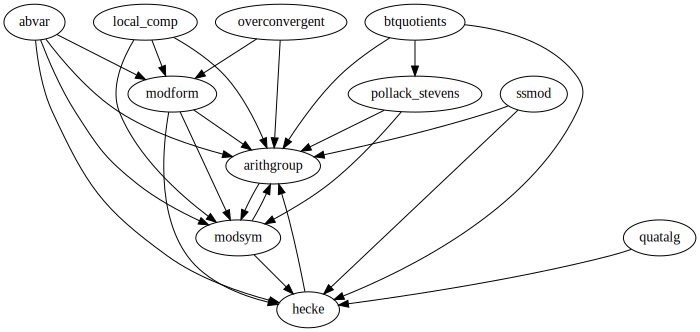

In [5]:
import re
import glob
import graphviz

mod_path = 'modular/'
D = graphviz.Digraph()

# add vertices
all_py = glob.glob(mod_path+'*/all.py')
Vs = [x.split('/')[-2] for x in all_py]

existing_edges = []
# add edges
for V in Vs:
    for s in glob.glob(mod_path+V+'/*'):
        with open(s,'r') as f:
            for l in f:
                if re.match('from sage.modular', l):
                    B = l.split(' ')[1].split('.')[2]
                elif re.match('import sage.modular', l):
                    B = l.split(' ')[1].split('.')[2]
                else:
                    continue
                if B in Vs and B!=V and (V, B) not in existing_edges:
                    existing_edges.append((V,B))
                    D.edge(V, B)
D

In [6]:
D.save('a.svg')

'a.svg'

In [8]:
D.view('modform')

'modform.pdf'